In [ ]:
!pip install -r requirements.txt

  Cloning git://github.com/schlegelp/navis (to revision master) to /tmp/pip-req-build-u4b86w25
  Running command git clone -q git://github.com/schlegelp/navis /tmp/pip-req-build-u4b86w25
  Cloning git://github.com/schlegelp/pymaid (to revision master) to /tmp/pip-req-build-0dek1p6_
  Running command git clone -q git://github.com/schlegelp/pymaid /tmp/pip-req-build-0dek1p6_
  Created wheel for navis: filename=navis-0.5.2-py3-none-any.whl size=1935508 sha256=fbba59d0015398de8bd8c69c4818d7c0a5a087b0b44f509bcad8e75881147c63
  Stored in directory: /tmp/pip-ephem-wheel-cache-cnxnoc8l/wheels/03/8b/0b/a4ed865ca73fb0d3dd0351d836ee7c96bf1dcb884d6e85c1c4
  Created wheel for python-catmaid: filename=python_catmaid-2.0.3-py3-none-any.whl size=169810 sha256=2dfab2f0d37dcec1da77410d61781a2320bfc1f76793e28910dec210458ae44a
  Stored in directory: /tmp/pip-ephem-wheel-cache-cnxnoc8l/wheels/af/96/93/0e2f774ba19ecfaf51a02d888f3fa16cc6e784d99186915d9e
Successfully built navis python-catmaid
You should cons

In [6]:
# Import libs and initialise API objects
from vfb_connect.cross_server_tools import VfbConnect
import pandas as pd
vc = VfbConnect(neo_endpoint='http://pdbl.p2.virtualflybrain.org')

import pymaid
import navis

navis.set_pbars(jupyter=False)
pymaid.set_pbars(jupyter=False)

# Connect to the VFB CATMAID server hosting the FAFB data
rm = pymaid.connect_catmaid(server="https://fafb.catmaid.virtualflybrain.org/", api_token=None, max_threads=10)

# Test call to see if connection works 
print(f'Server is running CATMAID version {rm.catmaid_version}')


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
Server is running CATMAID version 2020.02.15-905-g93a969b37


### VFB provides a simple way in to exploring connectomics data

In [10]:
vc.get_connected_neurons_by_type(upstream_type='GABAergic neuron', downstream_type='adult descending neuron', weight=10)


,upstream_neuron_id,upstream_neuron_name,weight,downstream_neuron_id,downstream_neuron_name,upstream_class,downstream_class,up_data_source,up_accession,down_source,down_accession
0,VFB_jrchk8dp,oviIN_R - 423101189,35,VFB_jrchk8dn,oviDNb(PDM15)_L - 642763374,oviposition inhibitory neuron,oviposition descending neuron b,None,None,None,None
1,VFB_jrchk8dq,oviIN_L - 485934965,27,VFB_jrchk8dm,oviDNa_R - 550655668,oviposition inhibitory neuron,oviposition descending neuron a,None,None,None,None
2,VFB_jrchk7jh,VP4+_vPN(mlALT)_R - 543010474,28,VFB_jrchjtg4,DNg30_R - 571346836,adult antennal lobe projection neuron VP4+ vPN,descending neuron of the gnathal ganglion DNg30,None,None,None,None
3,VFB_jrchjza4,LHPV2c1_b_R - 825032139,13,VFB_jrchjthr,DNp32_R - 5813050455,adult lateral horn PV2c1 neuron|adult lateral ...,descending neuron of the posterior brain DNp32...,None,None,None,None
4,VFB_jrchk7jh,VP4+_vPN(mlALT)_R - 543010474,47,VFB_jrchjthj,DNp25_R - 451689001,adult antennal lobe projection neuron VP4+ vPN,descending neuron of the posterior brain DNp25,None,None,None,None
5,VFB_jrchk7jh,VP4+_vPN(mlALT)_R - 543010474,12,VFB_jrchjthh,DNp24_R - 5813047199,adult antennal lobe projection neuron VP4+ vPN,descending neuron of the posterior brain DNp24,None,None,None,None
6,VFB_jrchjtd8,CT1_L - 1311993208,12,VFB_jrchjtgf,DNp11_R - 1281324958,tangential neuron CT1,descending neuron of the posterior brain DNp11,None,None,None,None
7,VFB_jrchk7jh,VP4+_vPN(mlALT)_R - 543010474,50,VFB_jrchjthu,DNp44_R - 542751938,adult antennal lobe projection neuron VP4+ vPN,descending neuron of the posterior brain DNp44,None,None,None,None
8,VFB_jrchk8dp,oviIN_R - 423101189,36,VFB_jrchk8do,oviDNb_R - 519949044,oviposition inhibitory neuron,oviposition descending neuron b,None,None,None,None
9,VFB_jrchjza3,LHPV2c1_b_R - 856066807,11,VFB_jrchjthr,DNp32_R - 5813050455,adult lateral horn PV2c1 neuron|adult lateral ...,descending neuron of the posterior brain DNp32...,None,None,None,None


In [11]:
vc.get_neurons_downstream_of('DA3_adPN_R - 1703683361', weight = 20)

,query_neuron_id,query_neuron_name,weight,target_neuron_id,target_neuron_name
0,VFB_jrchjtdn,DA3_adPN_R - 1703683361,23,VFB_jrchjw2i,KCg-m_R - 415852518
1,VFB_jrchjtdn,DA3_adPN_R - 1703683361,37,VFB_jrchk8ao,lLN2P_a(Patchy)_R - 2041621893
2,VFB_jrchjtdn,DA3_adPN_R - 1703683361,20,VFB_jrchjw2a,KCg-m_R - 416189500
3,VFB_jrchjtdn,DA3_adPN_R - 1703683361,26,VFB_jrchk8bo,lLN2T_c(Tortuous)_R - 1671292719
4,VFB_jrchjtdn,DA3_adPN_R - 1703683361,23,VFB_jrchjz1e,LHAV5e1_R - 480276374
5,VFB_jrchjtdn,DA3_adPN_R - 1703683361,21,VFB_jrchk8b0,lLN2P_c(Patchy)_R - 2105086391
6,VFB_jrchjtdn,DA3_adPN_R - 1703683361,21,VFB_jrchjzi1,LHPV5e2_R - 294787849


In [12]:
vc.get_neurons_downstream_of('DA3_adPN_R - 1703683361', classification="'Kenyon cell'", weight = 20)

Running query: FBbt:00003686
Query URL: http://owl.virtualflybrain.org/kbs/vfb/instances?object=FBbt%3A00003686&prefixes=%7B%22FBbt%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FFBbt_%22%2C+%22RO%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FRO_%22%2C+%22BFO%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FBFO_%22%7D&direct=False
Query results: 5328


,query_neuron_id,query_neuron_name,weight,target_neuron_id,target_neuron_name
0,VFB_jrchjtdn,DA3_adPN_R - 1703683361,23,VFB_jrchjw2i,KCg-m_R - 415852518
1,VFB_jrchjtdn,DA3_adPN_R - 1703683361,20,VFB_jrchjw2a,KCg-m_R - 416189500


### More sophisticated connectomics queries require direct queries of connectomics DB APIs

#### Pymaid connectivity queries

Broadly speaking, CATMAID lets you fetch connectivity data as either lists of up- and downstream partners or as whole adjacency matrices.

These examples use the VFB FAFB server.

In [19]:
# Using VFB to get neurons by type
DA1 = vc.get_instances("'adult antennal lobe projection neuron DA1'", summary=True)
DA1_tab = pd.DataFrame.from_records(DA1)
len(DA1_tab)
DA1_tab

Running query: FBbt:00048096
Query URL: http://owl.virtualflybrain.org/kbs/vfb/instances?object=FBbt%3A00048096&prefixes=%7B%22FBbt%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FFBbt_%22%2C+%22RO%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FRO_%22%2C+%22BFO%22%3A+%22http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FBFO_%22%7D&direct=False
Query results: 31


,label,symbol,id,tags,parents_label,parents_id,data_source,accession,templates,dataset,license
0,Uniglomerular mALT DA1 lPN#L2 (FAFB:2319457),,VFB_0010122k,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC2018Unisex,BatesSchlegel2020,https://creativecommons.org/licenses/by-sa/4.0...
1,DA1_lPN_R - 5813039315,,VFB_jrchjtdd,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC2018Unisex|JRC_FlyEM_Hemibrain,Xu2020NeuronsV1point1,https://creativecommons.org/licenses/by/4.0/le...
2,Uniglomerular mALT DA1 lPN#R4 (FAFB:755022),,VFB_00101205,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,adult brain template JFRC2|JRC2018Unisex,Zheng2018,https://creativecommons.org/licenses/by-sa/4.0...
3,Uniglomerular mALT DA1 lPN#L4 (FAFB:2379517),,VFB_0010122y,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC2018Unisex,BatesSchlegel2020,https://creativecommons.org/licenses/by-sa/4.0...
4,ALv1_P02(DA1)_0_2018U,,VFB_00102297,Entity|GABAergic|Adult|Anatomy|has_image|Cell|...,adult antennal lobe projection neuron DA1 vPN,FBbt_00067372,,,JRC2018Unisex,Lee2020,https://creativecommons.org/licenses/by/4.0/le...
5,DA1_lPN_R - 754538881,,VFB_jrchjtdg,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC_FlyEM_Hemibrain|JRC2018Unisex,Xu2020NeuronsV1point1,https://creativecommons.org/licenses/by/4.0/le...
6,ALv1_P02(DA1)_0_2018U,,VFB_00104629,Entity|GABAergic|Adult|Anatomy|has_image|Cell|...,adult antennal lobe projection neuron DA1 vPN,FBbt_00067372,,,JRC2018Unisex,Yu2013,https://creativecommons.org/licenses/by-nc-sa/...
7,ALv1_P02(DA1)_0_2018U,,VFB_00104624,Entity|GABAergic|Adult|Anatomy|has_image|Cell|...,adult antennal lobe projection neuron DA1 vPN,FBbt_00067372,,,JRC2018Unisex,Yu2013,https://creativecommons.org/licenses/by-nc-sa/...
8,Uniglomerular mALT DA1 lPN#L7 (FAFB:3239781),,VFB_0010124l,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC2018Unisex,BatesSchlegel2020,https://creativecommons.org/licenses/by-sa/4.0...
9,DA1_lPN_R - 1734350788,,VFB_jrchjtdf,Entity|has_image|Adult|Anatomy|has_neuron_conn...,adult antennal lobe projection neuron DA1 lPN,FBbt_00067363,,,JRC2018Unisex|JRC_FlyEM_Hemibrain,Xu2020NeuronsV1point1,https://creativecommons.org/licenses/by/4.0/le...


In [23]:
# Map neurons to CATMAID Skeleton IDs (skids)

da1_skids = vc.neo_query_wrapper.vfb_id_2_xrefs(DA1_tab['id'], db='catmaid_fafb', reverse_return=True)
da1_skids_int = list(map(int, da1_skids))
da1_skids

/root/venv/lib/python3.7/site-packages/vfb_connect/neo/query_wrapper.py:279: UserWarning:

The following IDs do not match DB &/or id_type constraints: {'VFB_0010126e', 'VFB_0010122z', 'VFB_00104624', 'VFB_0010122m', 'VFB_00104629', 'VFB_jrchjtdd', 'VFB_00101204', 'VFB_00102297', 'VFB_0010124e', 'VFB_0010122k', 'VFB_00101201', 'VFB_00101200', 'VFB_00102294', 'VFB_0010124l', 'VFB_00101202', 'VFB_jrchjtdg', 'VFB_0010122p', 'VFB_00101203', 'VFB_0010121x', 'VFB_jrchjtdb', 'VFB_0010122y', 'VFB_jrchjtde', 'VFB_00101199', 'VFB_00103943', 'VFB_jrchjtda', 'VFB_00102763', 'VFB_jrchjtdh', 'VFB_00101205', 'VFB_jrchjtdc', 'VFB_jrchjtdf', 'VFB_0010123b'}



{'2863104': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010124e'}],
 '57353': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101202'}],
 '2381753': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010123b'}],
 '1811442': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010121x'}],
 '57323': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101201'}],
 '57311': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101200'}],
 '2345089': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010122p'}],
 '27295': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101199'}],
 '2379517': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010122y'}],
 '2380564': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010122z'}],
 '755022': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101205'}],
 '61221': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101204'}],
 '57381': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00101203'}],
 '3239781': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010124l'}],
 '4207871': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_0010126e'}],
 '2334841': [{'db': 'catmaid_fafb', 'vfb_id': 'VFB_00

Generate a connectivity table for neurons downstream of DA1 neurons

In [21]:
da1 = pymaid.get_neurons(da1_skids_int)
da1_ds = pymaid.get_partners(da1_skids_int,
                             threshold=3,  # anything with >= 3 synapses
                             directions=['outgoing']  # downstream partners only
                            )

# Result is a pandas DataFrame
da1_ds.head()

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Fetching connectivity table for 17 neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Done. Found 0 pre-, 270 postsynaptic and 0 gap junction-connected neurons (pymaid)


,neuron_name,skeleton_id,num_nodes,relation,2863104,57353,2381753,1811442,57323,57311,...,2379517,2380564,755022,61221,57381,3239781,4207871,2334841,2319457,total
0,Uniglomerular mlALT DA1 vPN mlALTed Milk 18114...,1811442,11769,downstream,30,3,0,0,20,21,...,0,0,32,26,4,0,0,0,0,151.0
1,Uniglomerular mlALT DA1 vPN mlALTed Milk 23348...,2334841,6362,downstream,0,0,32,0,0,0,...,28,0,0,0,0,26,17,0,22,139.0
2,LHAV4a4#1 1911125 FML PS RJVR,1911124,6969,downstream,23,6,0,0,15,19,...,0,0,19,13,9,0,0,0,0,109.0
3,LHAV2a3#1 1870231 RJVR AJES PS,1870230,14820,downstream,5,23,0,1,7,5,...,0,0,19,7,28,0,0,0,0,105.0
4,LHAV4c1#1 488056 downstream DA1 GSXEJ,488055,12137,downstream,15,3,0,0,11,17,...,0,0,15,15,0,0,0,0,0,92.0


In [ ]:
# Get an adjacency matrix between all Bates, Schlegel et al. neurons
bates = pymaid.find_neurons(annotations='Paper: Bates and Schlegel et al 2020')
adj = pymaid.adjacency_matrix(bates)
adj.head()

INFO  : Found 583 neurons matching the search parameters (pymaid)


targets,2863104,57349,57353,16,57361,15738898,57365,4182038,3813399,11524119,...,57323,4624362,1853423,2842610,57333,4624374,3080183,57337,4624378,57341
sources,,,,,,,,,,,,,,,,,,,,,
2863104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



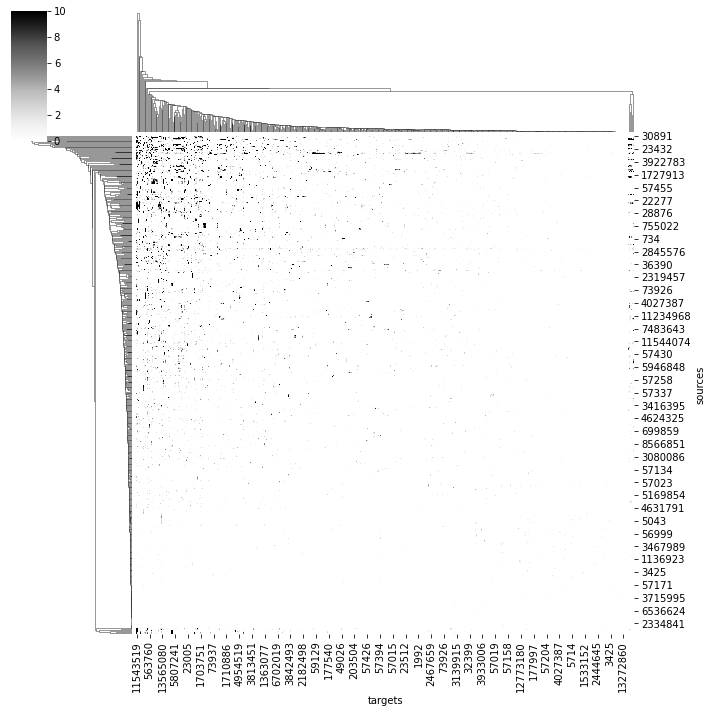

In [ ]:
import seaborn as sns 

ax = sns.clustermap(adj, vmax=10, cmap='Greys')

In [ ]:
# Axo-axonic connections between two different types of DA1 PNs
cn = pymaid.get_connectors_between(2863104, 1811442)
cn.head()

,connector_id,connector_loc,node1_id,source_neuron,confidence1,creator1,node1_loc,node2_id,target_neuron,confidence2,creator2,node2_loc
0,6736296,"[359448.44, 159319.03, 150560.0]",3163408,2863104,5,NaN,"[359487.3, 159145.66, 150600.0]",6736298,1811442,5,NaN,"[359611.9, 159541.48, 150560.0]"
1,6795172,"[356041.88, 149555.53, 147920.0]",6795195,2863104,5,NaN,"[354724.44, 149284.1, 147920.0]",6795153,1811442,5,NaN,"[356366.16, 149854.86, 147920.0]"
2,6795291,"[355189.5, 150232.48, 148240.0]",6795293,2863104,5,NaN,"[354595.62, 149464.8, 148240.0]",6795214,1811442,5,NaN,"[355472.28, 150294.75, 148160.0]"
3,6795747,"[355030.4, 154047.86, 145800.0]",6795749,2863104,5,NaN,"[355045.38, 154180.1, 145800.0]",6795745,1811442,5,NaN,"[355024.44, 153945.73, 145760.0]"
4,6797452,"[353221.4, 148570.9, 147320.0]",6797456,2863104,5,NaN,"[354213.9, 148397.44, 147320.0]",6797437,1811442,5,NaN,"[353447.6, 148704.88, 147560.0]"


In [ ]:
import numpy as np 

points = np.vstack(cn.connector_loc)

navis.plot3d([da1.idx[[1811442, 57353
]],  # plot the two neurons
              points],  # plot the points of synaptic contacts as scatter 
              scatter_kws=dict(name="synaptic contacts")
              )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=94cb7c07-bfd7-4142-b5f9-bec41746df04' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>